# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/PythonCourse/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations: There are 1898 rows and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are three datatypes. They are integers, objects, and float.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are 0 missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00



#### Observations: For the food_preparation_time, the minimum amount of time is 20 minutes. The average amount of time it takes to prepare the food is 2.41. The maximum time is 35 minutes. 


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order ID

In [ ]:
df['order_id'].nunique()

1898

Observations for Order ID: There are 1898 unique orders. 

Customer ID

In [ ]:
df['customer_id'].nunique()

1200

Observations for Customer ID: There are 1200 unique customers.

Order Cost

In [ ]:
df['cost_of_the_order'].nunique()

312

<function matplotlib.pyplot.show(*args, **kw)>

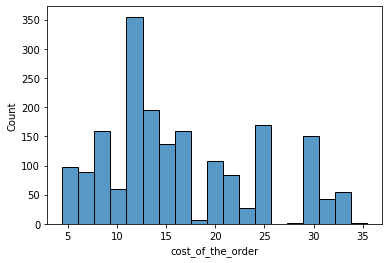

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

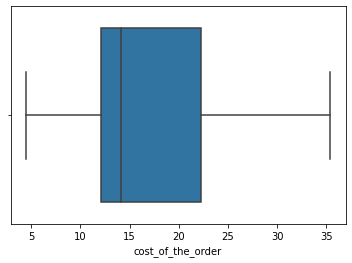

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.show

Observations for Order Cost: There are 312 individual costs of orders. According to the histogram, majority of the orders are between 10 and 15 dollars.

Restaurant Name

In [ ]:
df['restaurant_name'].nunique()

178

There are 178 unique restaurants.

Cuisine Type

In [ ]:
df['cuisine_type'].nunique()

14

<function matplotlib.pyplot.show(*args, **kw)>

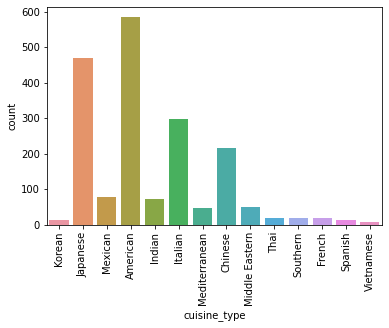

In [ ]:
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show

There are 14 unique cuisine types. According to the plot, the 14 cuisine types are Korean, Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French, Spanish and Vietnamese.



Day of the week

In [ ]:
df['day_of_the_week'].nunique()

2

<function matplotlib.pyplot.show(*args, **kw)>

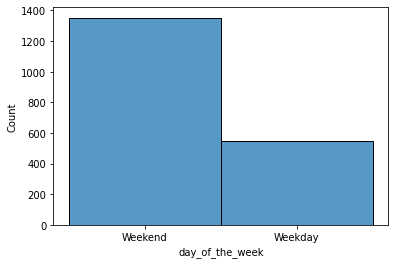

In [ ]:
sns.histplot(data=df,x='day_of_the_week')
plt.show

Observations for Day of the Week: There are two options, either the weekend or a weekday. According to the plot, more people frequent restaurants on the weekend than on a weekday. 

Rating

In [ ]:
df['rating'].nunique()

4

<function matplotlib.pyplot.show(*args, **kw)>

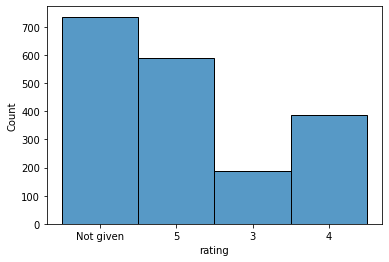

In [ ]:
sns.histplot(data=df,x='rating')
plt.show

Observations for Rating: There are four categories for rating. The four categories are 5 stars, 3 stars, 4 stars, or no rating given. From the plot, it appears majority of the dataset didn't give a rating.

Food preparation time

<function matplotlib.pyplot.show(*args, **kw)>

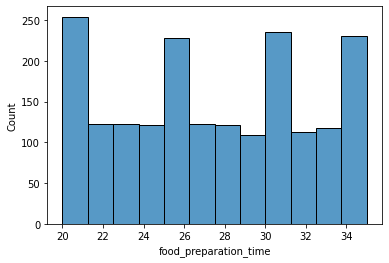

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

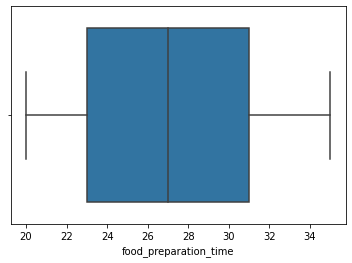

In [ ]:
sns.boxplot(data=df,x='food_preparation_time')
plt.show

Observations for Food preparation time: The times seem to vary from 20 minutes to 34 minutes. On average, it seems to be about between 26 to 28 minutes. 

Delivery Time

<function matplotlib.pyplot.show(*args, **kw)>

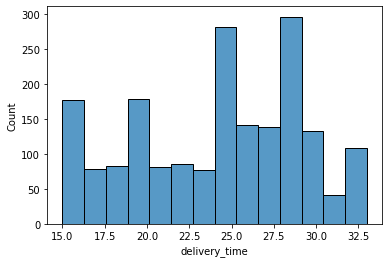

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

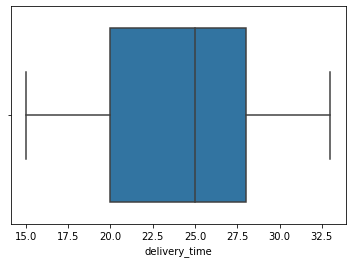

In [ ]:
sns.boxplot(data=df,x='delivery_time')
plt.show

Observations for Delivery time: The times seem to vary from 15 minutes to 32 and a half minutes. The average delivery time is around 25 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top five restaurants are Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chiekn with 96 orders, and Parm with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: The most popular cuisine on the weekends is American cuisine, as there are 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df_greater_than_20=df[df['cost_of_the_order']>20]

In [ ]:
print('The number of orders that cost more than 20 dollars is:',df_greater_than_20.shape[0])

The number of orders that cost more than 20 dollars is: 555


In [ ]:
percentage = (df_greater_than_20.shape[0]/df.shape[0])*100

In [ ]:
percentage

29.24130663856691

In [ ]:
print("The percentage of the number of orders that cost more than 20 dollars is",round(percentage,2),'%')

The percentage of the number of orders that cost more than 20 dollars is 29.24 %


#### Observations: There are 555 orders that cost more than 20 dollars. 29.24 percent of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()

In [ ]:
print('The mean delivery time is',round(mean_delivery_time,2),'minutes')

The mean delivery time is 24.16 minutes


#### Observations: The average order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The top three customers' order ids are 52832 with 13 orders, 47440 with 10 orders, and 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


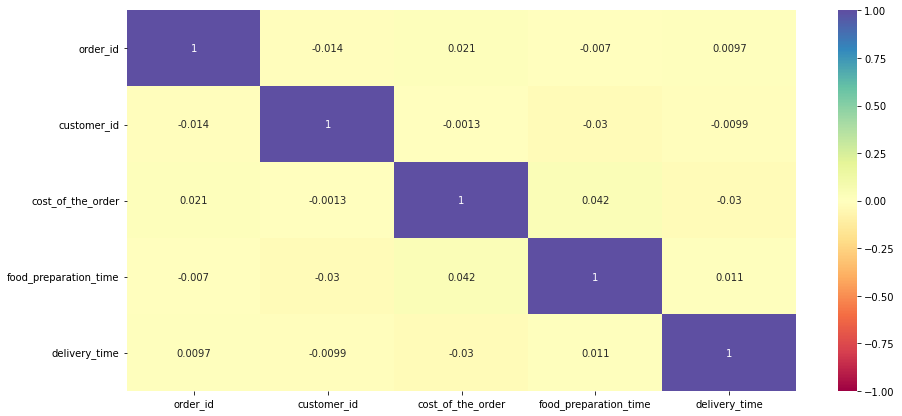

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

General observations:
*   According to this heatmap, it seems to be pretty even all around, with no particularly strong correlations.

Exploring the relation between all the numerical variables

<function matplotlib.pyplot.show(*args, **kw)>

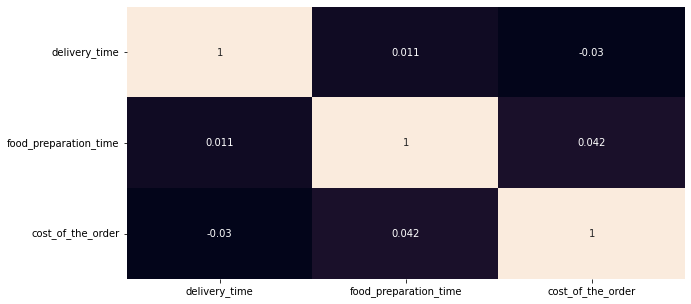

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df[['rating','delivery_time','food_preparation_time','cost_of_the_order']].corr(),annot=True,cbar=False);
plt.show

Observations for all numerical variables' correlation: There is very little negative or positive correlation between the variables.

Day of the week and Delivery Time

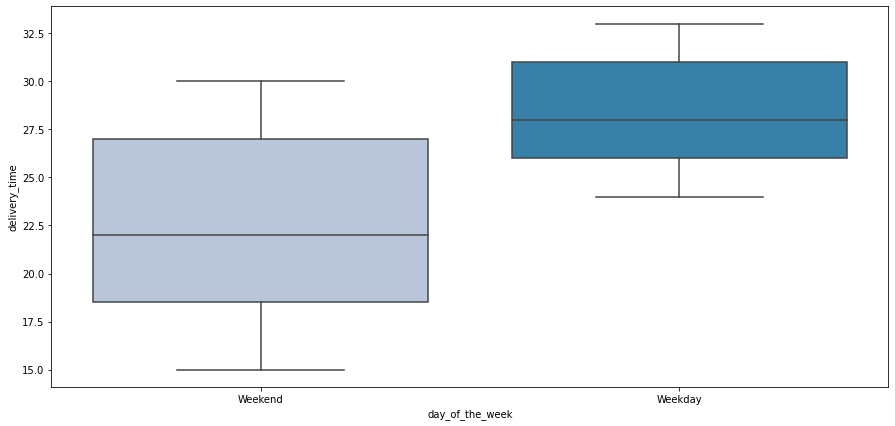

In [6]:
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week",y="delivery_time",data=df,palette='PuBu')
plt.show()

Observations for Delivery Time and Day of the Week:
*   From observing the plot, it appears that overall, weekdays have longer delivery times as the minimum time is nearly 25 minutes and the maximum time is 32.5 minutes.
*   In contrast, weekends have a minimum delivery time of 15 minutes and a maximum delivery time of 30 minutes.



Rating and Delivery Time

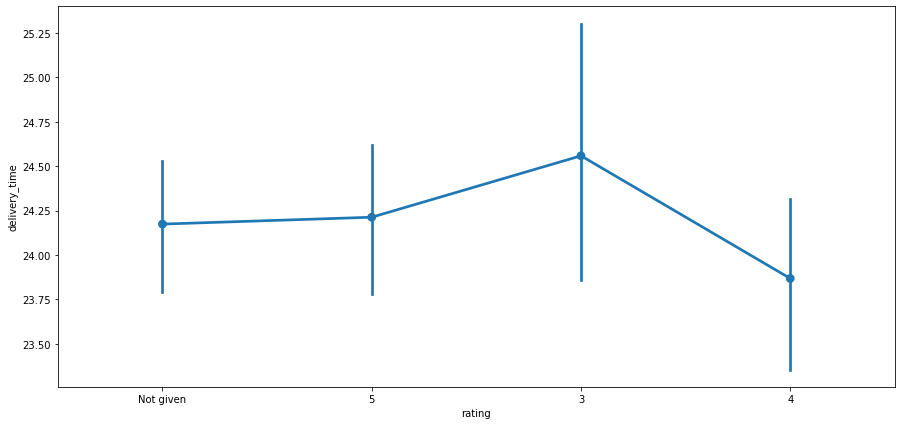

In [8]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = "rating", y = "delivery_time", data = df)
plt.show()

Observations for Rating and Delivery Time: From this chart, it appears that if the delivery time is longer such as 25 minutes, the customer is more likely to give it a lower rating. However, if the order takes less time, the customer is more likely to give it 4 stars at times. However, majority of customers tend to give 5 stars or not give a rating at all if the delivery time is average, around 24.25 minutes. 

Rating and Order Cost

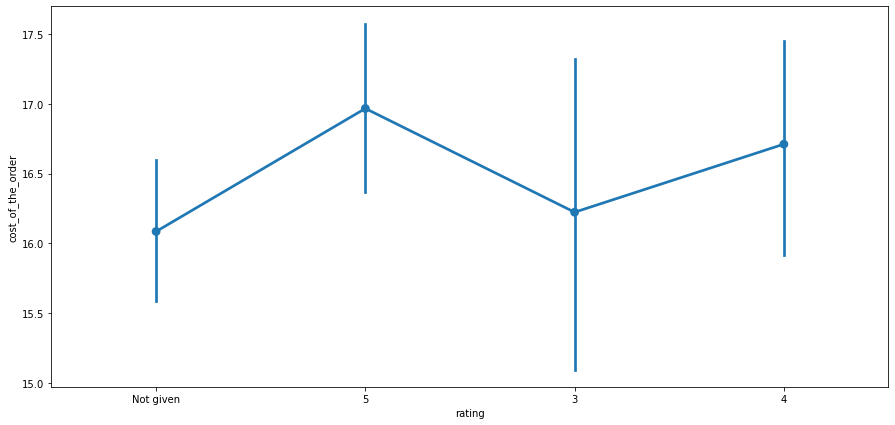

In [11]:
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating",y="cost_of_the_order",data=df)   
plt.show()

Observations for Rating and Order Cost: From this plot, the greater the cost the order, the more likely the customer is to give a higher rating such as 4 or 5 stars. However, if the order costs less, the customer is more likely to give 3 stars as 3 stars have a minimum of 15 dollars. In constrast, 5 stars has a minimum of a little more than 16 dollars. 

Rating and Food preparation Time

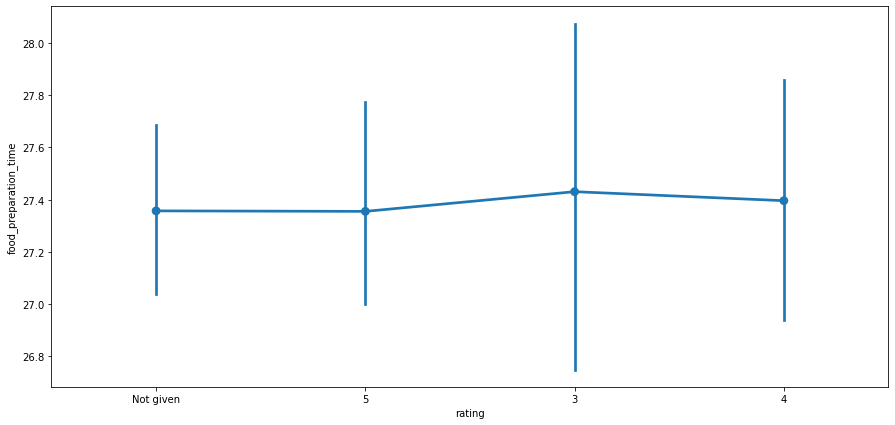

In [12]:
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating",y="food_preparation_time",data=df) 
plt.show()

Observations for rating and food preparation time: From this plot, the longer it takes for the food to be prepared, the more likely the customer is to give 3 stars. However, if the food preparation time is around the average time from 27.0 to 27.8 minutes, the customer is more likely to give 5 stars or not give a rating at all. 

Cuisine and Order Cost

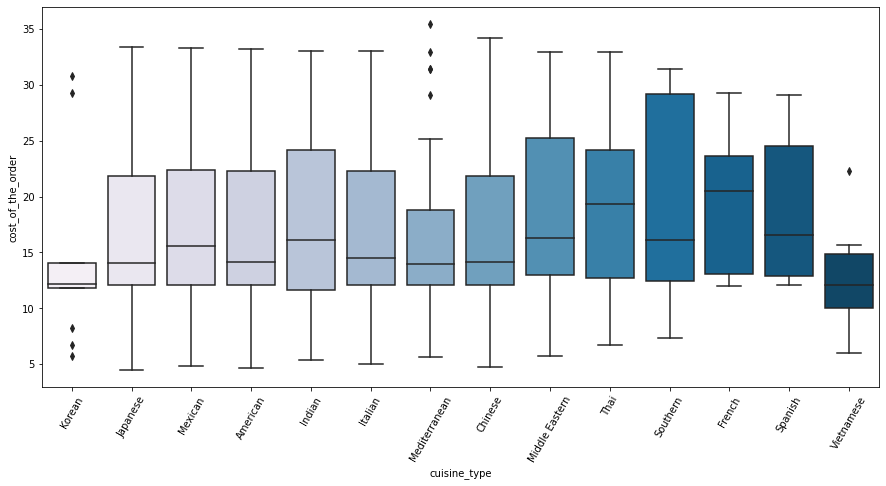

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations for Cuisine and Order Cost: 

*   Korean cuisine appears to be the cheapest with the average cost being around 13 dollars while the other cuisines seem to be more varied, with Chinese having the highest order cost at almost 35 dollars. 
*   Mediterranean seems to have the most outliers with their costs going from 13 to 19 dollars, with outliers of order costs in the 30s.
*   French appears to be more expensive, as it has a higher average than the other cuisines in its cost.




Cuisine and Rating and Food Preparation Time

<Figure size 1080x504 with 0 Axes>

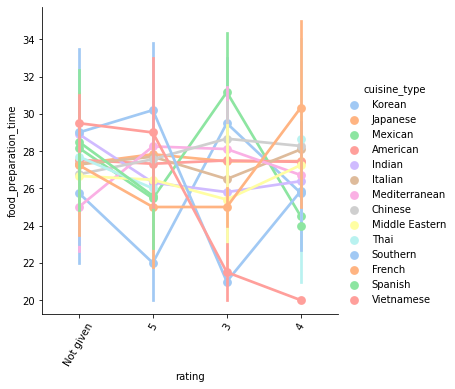

In [57]:
plt.figure(figsize=(15,7))
sns.catplot(x = "rating", y = "food_preparation_time", data = df, palette = 'pastel',hue='cuisine_type',kind='point')
plt.xticks(rotation = 60)
plt.show()

Observations for Cuisine and Rating and Food preparation time: For some cuisine types such as Chinese and Italian, the food preparation time stays consistent while the ratings vary. For others such as Vietnamese food, the food preparation vary wildly, while the ratings seem to mostly either be not given at all or 5 stars.

Cuisine and Food preparation Time

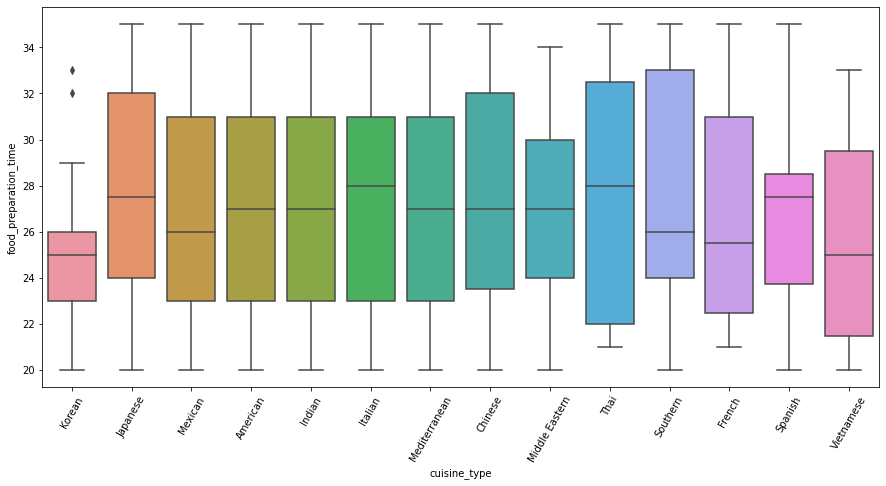

In [5]:
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type",y="food_preparation_time",data=df) 
plt.xticks(rotation = 60)
plt.show()

Observations for Cuisine Type and Food preparation time: 
*   For the different cuisines, from this plot, Korean cuisine is the only one with outliers, however it also has the smallest range in the food preparation times compared to other cuisines.
*   Majority of the cuisines appear to have the similar shortest time of about 20 minutes and the longest time to prepare food being more than 34 minutes.
*   Thai has the highest minimum time to prepare food at nearly 22 minutes.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_rated=df[df['rating'] !='Not given'].copy()

In [ ]:
df_rated['rating']=df_rated['rating'].astype('int')

In [ ]:
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
restaurant_names_50=df_rating_count[df_rating_count['rating']>50]['restaurant_name']

In [ ]:
restaurant_mean_4=df_rated[df_rated['restaurant_name'].isin(restaurant_names_50)].copy()

In [ ]:
restaurant_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: There are four restaurants with more than 50 ratings and an average rating greater than 4 which are The Meatball Shop, Blue Friend Fried Chicken, Shake Shack, and Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

For orders greater than $20 revenue:




In [ ]:
cost_revenue_25=df[df["cost_of_the_order"]>20]['cost_of_the_order'].sum()
total_cost_revenue_25=cost_revenue_25*0.25
print("The revenue of orders generated from a order value of more than 20$ is:", "{:.2f}$".format(total_cost_revenue_25))

The revenue of orders generated from a order value of more than 20$ is: 3688.73$


For orders that cost between 5 and 20 dollars and their revenue:

In [ ]:
cost_revenue_15=df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20)]['cost_of_the_order'].sum()
total_cost_revenue_15=cost_revenue_15*0.15
print("The revenue of orders generated from orders that cost more than 5 dollars but less than are 20 dollars are:","{:.2f}$".format(total_cost_revenue_15))

The revenue of orders generated from orders that cost more than 5 dollars but less than are 20 dollars are: 2477.58$


For orders that cost less than 5 dollars revenue:

In [ ]:
cost_revenue_5=df[(df["cost_of_the_order"]<=5)]['cost_of_the_order'].sum()
print("The revenue of orders generated from orders that cost less than 5 dollars is:","{:.2f}$".format(cost_revenue_5))

The revenue of orders generated from orders that cost less than 5 dollars is: 42.74$


Calculating the total revenue overall:

In [ ]:
print("The total revenue of all the orders is:","{:.2f}$".format(cost_revenue_5+total_cost_revenue_15+total_cost_revenue_25))

The total revenue of all the orders is: 6209.04$


#### Observations: 

*   The revenue of orders greater than 20 is 3688.73.
*   The revenue of orders between 5 and 20 is 2477.58.
*   The revenue of orders less than or equal to 5 is 42.74.
*   Combining the revenue of all the orders leads to a total revenue of 6209.04.






### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

In [ ]:
df_greater_than_60=df[df['total_time']>60]

In [ ]:
print('The number of orders that take more than 60 minutes is:',df_greater_than_60.shape[0])

The number of orders that take more than 60 minutes is: 200


In [ ]:
percentage_of_order = (df_greater_than_60.shape[0]/df.shape[0])*100

In [ ]:
print("The percentage of orders that take more than 60 mins in total time is",round(percentage_of_order,2),'%')

The percentage of orders that take more than 60 mins in total time is 10.54 %


#### Observations: In total, the number of orders that take more than 60 minutes in total time are 200 orders. The percentage of orders that take more than 60 minutes in total time is 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [ ]:
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')

The mean delivery time on weekends is around 22 minutes


#### Observations:
*   On weekdays, the average delivery time is 28 minutes.
*   On weekends, the average delivery time is 22 minutes.
*   From the data, the deliveries appear to take less time on the weekends than it does on the weekdays, even if both take more than 20 minutes.






### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
From the analysis, there's various information I've gleaned and made conclusions from. 

Overall Dataset Notes:
* There are 1898 orders total in this dataset.
* There are 1200 individual customers in this dataset.
* There are 178 restaurants
* There are 14 unique cuisine types, which include Korean, Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French, Spanish and Vietnamese.

Conclusions:
* From the plot we've made, American cuisine is the most popular of the cuisine types with 416 orders while Vietnamese cuisine has only 4 orders orders and is the least popular. 
* From the restaurants, Shake Shack is the most popular with 219 orders.
* Looking at the days of the weeks, weekends have more orders than the weekends. However, weekdays have longer delivery times than weekends. 
* For majority which was 736 of the orders, the rating was not given. The least common rating was 3 stars, with only 188 orders. 







### Recommendations:

*  According to the dataset, American cuisine is the most popular. Additionally, American cuisine is the most frequently ordered on the app as well. I would gear recommendations in the app towards American cuisine.
* Additionally, Korean cuisine is the cheapest, while French cuisine appears to be the most expensive.
* Majority of the orders are placed on the weekdays, due to people not having as much time to cook.
* Higher rated orders tend to cost more than lower rated orders.
* Mediterranean cuisine has the highest costing order of all the cuisines. 
* Thai food takes the longest to prepare, with a minimum of 22 minutes.
* Majority of the cuisines have a similar food preparation time. However, the longer the food takes to be prepared as well as delivered, the more likely it'll get a lower rating. 

---